In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
CNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/CNN_AID_1239_Predicted_Results.csv")
FFNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/FFNN_AID_1239_Predicted_Results.csv")
GCN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/GCN_AID_1239_Predicted_Results.csv")

GNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/GNN_AID_1239_Predicted_Results.csv")
AttentiveFP_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/AttentiveFP_AID_1239_Predicted_Results.csv")

In [ ]:
CNN_1239_same_test_data

,True_Label,Predicted_Label
0,Active,Active
1,Inactive,Inactive
2,Active,Active
3,Inactive,Inactive
4,Inactive,Inactive
...,...,...
795,Active,Active
796,Active,Active
797,Inactive,Inactive
798,Active,Inactive


In [ ]:
# rename True_Label: True_Label_CNN and Predicted_Label: Predicted_Label_CNN


# Rename columns
CNN_1239_same_test_data = CNN_1239_same_test_data.rename(columns={"True_Label": "True_Label_CNN", "Predicted_Label": "Predicted_Label_CNN"})

CNN_1239_same_test_data

,True_Label_CNN,Predicted_Label_CNN
0,Active,Active
1,Inactive,Inactive
2,Active,Active
3,Inactive,Inactive
4,Inactive,Inactive
...,...,...
795,Active,Active
796,Active,Active
797,Inactive,Inactive
798,Active,Inactive


In [ ]:
FFNN_1239_same_test_data

,True_Label,Predicted_Label
0,Active,Active
1,Inactive,Inactive
2,Active,Active
3,Inactive,Inactive
4,Inactive,Inactive
...,...,...
795,Active,Active
796,Active,Active
797,Inactive,Inactive
798,Active,Active


In [ ]:
#  rename True_Label: True_Label_FFNN and Predicted_Label: Predicted_Label_FFNN

FFNN_1239_same_test_data = FFNN_1239_same_test_data.rename(columns={"True_Label": "True_Label_FFNN", "Predicted_Label": "Predicted_Label_FFNN"})

FFNN_1239_same_test_data

,True_Label_FFNN,Predicted_Label_FFNN
0,Active,Active
1,Inactive,Inactive
2,Active,Active
3,Inactive,Inactive
4,Inactive,Inactive
...,...,...
795,Active,Active
796,Active,Active
797,Inactive,Inactive
798,Active,Active


In [ ]:
GCN_1239_same_test_data

,True_Label_GCN,Predicted_Label_GCN
0,Active,Inactive
1,Active,Inactive
2,Inactive,Active
3,Active,Inactive
4,Active,Inactive
...,...,...
795,Active,Active
796,Inactive,Inactive
797,Inactive,Inactive
798,Inactive,Inactive


In [ ]:
GNN_1239_same_test_data

,True_Label_GNN,Predicted_Label_GNN
0,Active,Active
1,Active,Inactive
2,Inactive,Active
3,Active,Active
4,Active,Inactive
...,...,...
795,Active,Active
796,Inactive,Inactive
797,Inactive,Inactive
798,Inactive,Inactive


In [ ]:
AttentiveFP_1239_same_test_data

,True_Label_AttentiveFP,Predicted_Label__AttentiveFP
0,Active,Inactive
1,Active,Inactive
2,Inactive,Active
3,Active,Active
4,Active,Inactive
...,...,...
795,Active,Active
796,Inactive,Inactive
797,Inactive,Inactive
798,Inactive,Inactive


In [ ]:
#  concatenate all the dataframes on axis = 1

import pandas as pd
concatenated_df = pd.concat([CNN_1239_same_test_data, FFNN_1239_same_test_data, GCN_1239_same_test_data, GNN_1239_same_test_data, AttentiveFP_1239_same_test_data], axis=1)
concatenated_df


,True_Label_CNN,Predicted_Label_CNN,True_Label_FFNN,Predicted_Label_FFNN,True_Label_GCN,Predicted_Label_GCN,True_Label_GNN,Predicted_Label_GNN,True_Label_AttentiveFP,Predicted_Label__AttentiveFP
0,Active,Active,Active,Active,Active,Inactive,Active,Active,Active,Inactive
1,Inactive,Inactive,Inactive,Inactive,Active,Inactive,Active,Inactive,Active,Inactive
2,Active,Active,Active,Active,Inactive,Active,Inactive,Active,Inactive,Active
3,Inactive,Inactive,Inactive,Inactive,Active,Inactive,Active,Active,Active,Active
4,Inactive,Inactive,Inactive,Inactive,Active,Inactive,Active,Inactive,Active,Inactive
...,...,...,...,...,...,...,...,...,...,...
795,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
796,Active,Active,Active,Active,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
797,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
798,Active,Inactive,Active,Active,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [ ]:
# Remove duplicate True_Label columns
concatenated_df = concatenated_df.loc[:,~concatenated_df.columns.duplicated()]
concatenated_df = concatenated_df.rename(columns={"True_Label_GCN": "True_Label"})

In [ ]:
#  Map 'Active' to 1 and 'Inactive' to 0
if concatenated_df['True_Label'].dtype == 'object':
    concatenated_df['True_Label'] = concatenated_df['True_Label'].map({'Active': 1, 'Inactive': 0})

model_columns = ['Predicted_Label_CNN', 'Predicted_Label_FFNN', 'Predicted_Label_GCN',
                 'Predicted_Label_GNN', 'Predicted_Label__AttentiveFP']

# Map predictions to 1 (Active) and 0 (Inactive)
for col in model_columns:
    if concatenated_df[col].dtype == 'object':
        concatenated_df[col] = concatenated_df[col].map({'Active': 1, 'Inactive': 0})

In [ ]:
#  Majority voting (threshold ≥ 3 out of 5)
concatenated_df['Predicted_Label_Majority'] = (concatenated_df[model_columns].sum(axis=1) >= 3).astype(int)


In [ ]:
#  Calculate metrics
y_true = concatenated_df['True_Label']
y_pred = concatenated_df['Predicted_Label_Majority']


In [ ]:
test_accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)


In [ ]:
#  Output results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Kappa: {kappa:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Test Accuracy: 0.7488
ROC AUC: 0.7488
F1 Score: 0.7439
Kappa: 0.4975
Precision: 0.7584
Recall: 0.7300


In [ ]:
#  Optional: Check how many Active predictions were made
print("\nPredicted class counts (Majority Voting):")
print(concatenated_df['Predicted_Label_Majority'].value_counts())


Predicted class counts (Majority Voting):
Predicted_Label_Majority
0    415
1    385
Name: count, dtype: int64


** Neglect all the below codes**

In [ ]:
new_df = concatenated_df.copy()

In [ ]:
#new_df = new_df[['Predicted_Label_CNN','Predicted_Label_FFNN','Predicted_Label_GCN','Predicted_Label_GNN','Predicted_Label__AttentiveFP']]

In [ ]:
#new_df.sample(5)

In [ ]:
new_df = new_df.drop(columns=['Predicted_Label_CNN','Predicted_Label_FFNN','Predicted_Label_GCN','Predicted_Label_GNN','Predicted_Label__AttentiveFP'])
new_df

,True_Label_CNN,True_Label_FFNN,True_Label_GCN,True_Label_GNN,True_Label_AttentiveFP
0,Active,Active,Active,Active,Active
1,Inactive,Inactive,Active,Active,Active
2,Active,Active,Inactive,Inactive,Inactive
3,Inactive,Inactive,Active,Active,Active
4,Inactive,Inactive,Active,Active,Active
...,...,...,...,...,...
795,Active,Active,Active,Active,Active
796,Active,Active,Inactive,Inactive,Inactive
797,Inactive,Inactive,Inactive,Inactive,Inactive
798,Active,Active,Inactive,Inactive,Inactive


In [ ]:
#  for the above new_df select rows that have all the values matching for corresponding columns

import pandas as pd


# Find rows where all values are the same
matching_rows = new_df[new_df.nunique(axis=1) == 1]

matching_rows

,True_Label_CNN,True_Label_FFNN,True_Label_GCN,True_Label_GNN,True_Label_AttentiveFP
0,Active,Active,Active,Active,Active
5,Active,Active,Active,Active,Active
7,Active,Active,Active,Active,Active
9,Active,Active,Active,Active,Active
10,Inactive,Inactive,Inactive,Inactive,Inactive
...,...,...,...,...,...
788,Active,Active,Active,Active,Active
793,Inactive,Inactive,Inactive,Inactive,Inactive
794,Active,Active,Active,Active,Active
795,Active,Active,Active,Active,Active


In [ ]:
matching_rows['True_Label_CNN'].value_counts()

,count
True_Label_CNN,
Active,210
Inactive,188


In [ ]:
#  want the data from concatenated_df where index is in matching_rows
# name the df ans concatenated_df
# Note: ****** this was selected to reduce the True_label columns to one by removing otehr True Labels as they are same. and Renaming to True Label ****

concatenated_df = concatenated_df.loc[matching_rows.index]
concatenated_df

,True_Label_CNN,Predicted_Label_CNN,True_Label_FFNN,Predicted_Label_FFNN,True_Label_GCN,Predicted_Label_GCN,True_Label_GNN,Predicted_Label_GNN,True_Label_AttentiveFP,Predicted_Label__AttentiveFP
0,Active,Active,Active,Active,Active,Inactive,Active,Active,Active,Inactive
5,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
7,Active,Active,Active,Active,Active,Inactive,Active,Active,Active,Inactive
9,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
10,Inactive,Inactive,Inactive,Inactive,Inactive,Active,Inactive,Active,Inactive,Inactive
...,...,...,...,...,...,...,...,...,...,...
788,Active,Active,Active,Active,Active,Inactive,Active,Active,Active,Active
793,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
794,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
795,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active


In [ ]:
# from concatenated_df remove
#  True_Label_GCN, True_Label_GNN, True_Label_AttentiveFP

concatenated_df = concatenated_df.drop(columns=['True_Label_CNN','True_Label_FFNN', 'True_Label_GNN', 'True_Label_AttentiveFP'])
concatenated_df

,Predicted_Label_CNN,Predicted_Label_FFNN,True_Label_GCN,Predicted_Label_GCN,Predicted_Label_GNN,Predicted_Label__AttentiveFP
0,Active,Active,Active,Inactive,Active,Inactive
5,Active,Active,Active,Active,Active,Active
7,Active,Active,Active,Inactive,Active,Inactive
9,Active,Active,Active,Active,Active,Active
10,Inactive,Inactive,Inactive,Active,Active,Inactive
...,...,...,...,...,...,...
788,Active,Active,Active,Inactive,Active,Active
793,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
794,Active,Active,Active,Active,Active,Active
795,Active,Active,Active,Active,Active,Active


In [ ]:
#  remove duplicate column from concatenated_df

concatenated_df = concatenated_df.loc[:,~concatenated_df.columns.duplicated()]
concatenated_df

,Predicted_Label_CNN,Predicted_Label_FFNN,True_Label_GCN,Predicted_Label_GCN,Predicted_Label_GNN,Predicted_Label__AttentiveFP
0,Active,Active,Active,Inactive,Active,Inactive
5,Active,Active,Active,Active,Active,Active
7,Active,Active,Active,Inactive,Active,Inactive
9,Active,Active,Active,Active,Active,Active
10,Inactive,Inactive,Inactive,Active,Active,Inactive
...,...,...,...,...,...,...
788,Active,Active,Active,Inactive,Active,Active
793,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
794,Active,Active,Active,Active,Active,Active
795,Active,Active,Active,Active,Active,Active


In [ ]:
#  rename column name True_Label_GCN as True_Label

# Rename the column
concatenated_df = concatenated_df.rename(columns={"True_Label_GCN": "True_Label"})

concatenated_df

,Predicted_Label_CNN,Predicted_Label_FFNN,True_Label,Predicted_Label_GCN,Predicted_Label_GNN,Predicted_Label__AttentiveFP
0,Active,Active,Active,Inactive,Active,Inactive
5,Active,Active,Active,Active,Active,Active
7,Active,Active,Active,Inactive,Active,Inactive
9,Active,Active,Active,Active,Active,Active
10,Inactive,Inactive,Inactive,Active,Active,Inactive
...,...,...,...,...,...,...
788,Active,Active,Active,Inactive,Active,Active
793,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
794,Active,Active,Active,Active,Active,Active
795,Active,Active,Active,Active,Active,Active


### Majority Voting

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score

# ✅ Step 1: Ensure mapping of True_Label to integers
if concatenated_df['True_Label'].dtype == 'object':
    concatenated_df['True_Label'] = concatenated_df['True_Label'].map({'Active': 1, 'Inactive': 0})

# ✅ Step 2: Ensure all model predictions are also mapped to integers (if not already)
model_columns = ['Predicted_Label_CNN', 'Predicted_Label_FFNN', 'Predicted_Label_GCN',
                 'Predicted_Label_GNN', 'Predicted_Label__AttentiveFP']

for col in model_columns:
    if concatenated_df[col].dtype == 'object':
        concatenated_df[col] = concatenated_df[col].map({'Active': 1, 'Inactive': 0})

# ✅ Step 3: Majority voting logic
concatenated_df['Predicted_Label_Majority'] = concatenated_df[model_columns].sum(axis=1)
concatenated_df['Predicted_Label_Majority'] = (concatenated_df['Predicted_Label_Majority'] >= 3).astype(int)

# ✅ Step 4: Metric calculations
y_true = concatenated_df['True_Label']
y_pred = concatenated_df['Predicted_Label_Majority']

test_accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# ✅ Step 5: Output results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Kappa: {kappa:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Test Accuracy: 0.4724
ROC AUC: 0.5000
F1 Score: 0.0000
Kappa: 0.0000
Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#  Do the following
#  use these labels for calculation: True_Label,Predicted_Label,Predicted_Label_GCN,	Predicted_Label_GNN, Predicted_Label__AttentiveFP
# for y_true use True_Label
# for y_pred use logical OR of (Predicted_Label,Predicted_Label_GCN,	Predicted_Label_GNN, Predicted_Label__AttentiveFP)
# 1. change Active as 1 Inactive as 0,
# 2. Perform logical OR operation
# 3. Calculate metrics y_true, y_pred
# # Assuming 'Inactive' represents the positive class (1) and 'Active' the negative class (0)
# # Create a mapping for label encoding (binary classification)
# Calculate the metrics:  test_accuracy, roc_auc,f1 Score, kappa, precision, recall
# output the metrics

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score
from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# CNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/CNN_AID_1239_Predicted_Results.csv")
# FFNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/FFNN_AID_1239_Predicted_Results.csv")
# GCN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/GCN_AID_1239_Predicted_Results.csv")

# GNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/GNN_AID_1239_Predicted_Results.csv")
# AttentiveFP_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/AttentiveFP_AID_1239_Predicted_Results.csv")

# concatenated_df = pd.concat([CNN_1239_same_test_data, FFNN_1239_same_test_data, GCN_1239_same_test_data, GNN_1239_same_test_data, AttentiveFP_1239_same_test_data], axis=1)
# concatenated_df = concatenated_df.drop(columns=['True_Label_GCN', 'True_Label_GNN', 'True_Label_AttentiveFP'])
# concatenated_df = concatenated_df.loc[:,~concatenated_df.columns.duplicated()]

# 1. Change 'Active' to 1 and 'Inactive' to 0
concatenated_df['True_Label'] = concatenated_df['True_Label'].map({'Active': 0, 'Inactive': 1})
concatenated_df['Predicted_Label'] = concatenated_df['Predicted_Label'].map({'Active': 0, 'Inactive': 1})
concatenated_df['Predicted_Label_GCN'] = concatenated_df['Predicted_Label_GCN'].map({'Active': 0, 'Inactive': 1})
concatenated_df['Predicted_Label_GNN'] = concatenated_df['Predicted_Label_GNN'].map({'Active': 0, 'Inactive': 1})
concatenated_df['Predicted_Label__AttentiveFP'] = concatenated_df['Predicted_Label__AttentiveFP'].map({'Active': 0, 'Inactive': 1})

# 2. Perform logical OR operation
concatenated_df['Predicted_Label_OR'] = np.logical_or.reduce([concatenated_df['Predicted_Label'],
                                                            concatenated_df['Predicted_Label_GCN'],
                                                            concatenated_df['Predicted_Label_GNN'],
                                                            concatenated_df['Predicted_Label__AttentiveFP']])


# 3. Calculate metrics
y_true = concatenated_df['True_Label']
y_pred = concatenated_df['Predicted_Label_OR']

test_accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Output the metrics
print(f"Test Accuracy: {test_accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")
print(f"Kappa: {kappa}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Mounted at /content/drive
Test Accuracy: 0.7361809045226131
ROC AUC: 0.7491641337386018
F1 Score: 0.7789473684210526
Kappa: 0.4849515640020705
Precision: 0.6445993031358885
Recall: 0.9840425531914894


In [ ]:
# prompt: for the above instead of logical OR use logical AND

import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score

# drive.mount('/content/drive', force_remount=True)

# CNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/CNN_AID_1239_Predicted_Results.csv")
# FFNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/FFNN_AID_1239_Predicted_Results.csv")
# GCN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/GCN_AID_1239_Predicted_Results.csv")

# GNN_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/GNN_AID_1239_Predicted_Results.csv")
# AttentiveFP_1239_same_test_data = pd.read_csv("/content/drive/MyDrive/Datasets/AID_1239/AttentiveFP_AID_1239_Predicted_Results.csv")

# concatenated_df = pd.concat([CNN_1239_same_test_data, FFNN_1239_same_test_data, GCN_1239_same_test_data, GNN_1239_same_test_data, AttentiveFP_1239_same_test_data], axis=1)
# concatenated_df = concatenated_df.drop(columns=['True_Label_GCN', 'True_Label_GNN', 'True_Label_AttentiveFP'])
# concatenated_df = concatenated_df.loc[:,~concatenated_df.columns.duplicated()]

# # 1. Change 'Active' to 1 and 'Inactive' to 0
# concatenated_df['True_Label'] = concatenated_df['True_Label'].map({'Active': 0, 'Inactive': 1})
# concatenated_df['Predicted_Label'] = concatenated_df['Predicted_Label'].map({'Active': 0, 'Inactive': 1})
# concatenated_df['Predicted_Label_GCN'] = concatenated_df['Predicted_Label_GCN'].map({'Active': 0, 'Inactive': 1})
# concatenated_df['Predicted_Label_GNN'] = concatenated_df['Predicted_Label_GNN'].map({'Active': 0, 'Inactive': 1})
# concatenated_df['Predicted_Label__AttentiveFP'] = concatenated_df['Predicted_Label__AttentiveFP'].map({'Active': 0, 'Inactive': 1})

# 2. Perform logical AND operation
concatenated_df['Predicted_Label_AND'] = np.logical_and.reduce([concatenated_df['Predicted_Label'],
                                                            concatenated_df['Predicted_Label_GCN'],
                                                            concatenated_df['Predicted_Label_GNN'],
                                                            concatenated_df['Predicted_Label__AttentiveFP']])


# 3. Calculate metrics
y_true = concatenated_df['True_Label']
y_pred = concatenated_df['Predicted_Label_AND']

test_accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Output the metrics
print(f"Test Accuracy: {test_accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")
print(f"Kappa: {kappa}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Test Accuracy: 0.7361809045226131
ROC AUC: 0.7221377912867274
F1 Score: 0.6263345195729537
Kappa: 0.45635488487056075
Precision: 0.946236559139785
Recall: 0.46808510638297873


In [ ]:
#ALternate Do not consider this code:

import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer

# Assuming 'concatenated_df' is already defined and contains necessary columns

# Validate necessary columns
required_columns = ['True_Label', 'Predicted_Label_CNN','Predicted_Label_FFNN', 'Predicted_Label_GCN', 'Predicted_Label_GNN', 'Predicted_Label__AttentiveFP']
if not all(col in concatenated_df.columns for col in required_columns):
    raise ValueError("One or more required columns are missing from concatenated_df")

# 1. y_true
y_true = concatenated_df['True_Label']

# 2. y_pred using majority vote
def majority_vote(row):
    # Get the predicted labels from the row
    votes = row[['Predicted_Label_CNN','Predicted_Label_FFNN', 'Predicted_Label_GCN', 'Predicted_Label_GNN', 'Predicted_Label__AttentiveFP']]
    # Return the most common label (mode)
    return votes.mode()[0]

# Apply the majority_vote function to each row to get y_pred
y_pred = concatenated_df.apply(majority_vote, axis=1)

# 3. Create new DataFrame with y_true and y_pred
results_df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

# 4. Calculate metrics
try:
    lb = LabelBinarizer()
    lb.fit(y_true)
    y_true_bin = lb.transform(y_true)
    y_pred_bin = lb.transform(y_pred)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_true_bin, y_pred_bin)
    #roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='weighted', multi_class='ovr')
except Exception as e:
    print(f"ROC AUC calculation failed: {e}")
    roc_auc = float('nan')  # Use NaN if ROC AUC calculation fails

# Calculate other metrics
train_accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
kappa = cohen_kappa_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'train_accuracy': [train_accuracy],
    'test_accuracy': [train_accuracy],  # Assuming train and test accuracy are the same here
    'roc_auc': [roc_auc],
    'f1 Score': [f1],
    'kappa': [kappa],
    'precision': [precision],
    'recall': [recall]
})

# Display the metrics DataFrame
print(metrics_df)

   train_accuracy  test_accuracy  roc_auc  f1 Score     kappa  precision  \
0        0.859296       0.859296  0.85998  0.859396  0.718358    0.86019   

     recall  
0  0.859296  


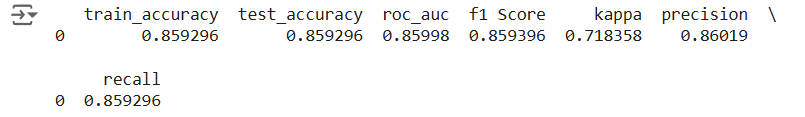